In [12]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [13]:
data = pd.read_csv("/content/T-test data.csv")

In [14]:
print(data.columns)
print(data.head())

Index(['Sl.NO', 'Child Name', 'DG ', 'school_type', 'English', 'Math',
       'out of', 'marks'],
      dtype='object')
   Sl.NO  Child Name  DG  school_type  English  Math  out of  marks
0      1   Thimmappa    0  government        4     4      10   80.0
1      2  Kumarswamy    0  government        2     3      10   50.0
2      3       Arman    0  government        4     4      10   80.0
3      4    Madhukar    0  government        4     4      10   80.0
4      5  Saba Reddy    0     private        5     5      10  100.0


In [15]:
data.rename(columns={'DG ':'DG'},inplace=True)

In [16]:
# DG alumni: Private vs Government
private = data[(data['DG'] == 1) & (data['school_type'] == 'private')]['marks']
govt    = data[(data['DG'] == 1) & (data['school_type'] == 'government')]['marks']

# DG vs Non-DG
dg     = data[data['DG'] == 1]['marks']
non_dg = data[data['DG'] == 0]['marks']

# Private vs Government (all)
priv_all = data[data['school_type'] == 'private']['marks']
gov_all  = data[data['school_type'] == 'government']['marks']


In [17]:
# ---- Welch’s t-tests (unequal variance) ----
res1 = stats.ttest_ind(private, govt, equal_var=False)
res2 = stats.ttest_ind(dg, non_dg, equal_var=False)
res3 = stats.ttest_ind(priv_all, gov_all, equal_var=False)

In [18]:
print(f"Case 1 (DG: Private vs Govt)  : t={res1.statistic:.2f}, p={res1.pvalue:.6f}, df={res1.df:.2f}")
print(f"Case 2 (DG vs Non-DG)        : t={res2.statistic:.2f}, p={res2.pvalue:.6f}, df={res2.df:.2f}")
print(f"Case 3 (Private vs Govt all) : t={res3.statistic:.2f}, p={res3.pvalue:.6f}, df={res3.df:.2f}")

Case 1 (DG: Private vs Govt)  : t=4.39, p=0.000537, df=14.82
Case 2 (DG vs Non-DG)        : t=0.75, p=0.454936, df=47.00
Case 3 (Private vs Govt all) : t=5.93, p=0.000001, df=38.82


In [19]:
# ---- Plotting function ----
def plot_t_distribution(t_stat, df, alpha=0.05):
    x = np.linspace(-6, 6, 400)
    y = stats.t.pdf(x, df)

    t_critical = stats.t.ppf(1 - alpha / 2, df)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f"t-dist (df={df:.2f})", color="blue")

    # Critical regions
    plt.fill_between(x, y, where=(x <= -t_critical), color="red", alpha=0.3)
    plt.fill_between(x, y, where=(x >=  t_critical), color="red", alpha=0.3)

    # Critical t lines
    plt.axvline(t_critical,  color="green", linestyle=":", label=f"Critical +t={t_critical:.2f}")
    plt.axvline(-t_critical, color="green", linestyle=":", label=f"Critical -t={-t_critical:.2f}")

    # Observed t line
    plt.axvline(t_stat, color="red", linestyle="--", label=f"Observed t={t_stat:.2f}")

    plt.title("t-Distribution with Welch df")
    plt.xlabel("t-value")
    plt.ylabel("Density")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()


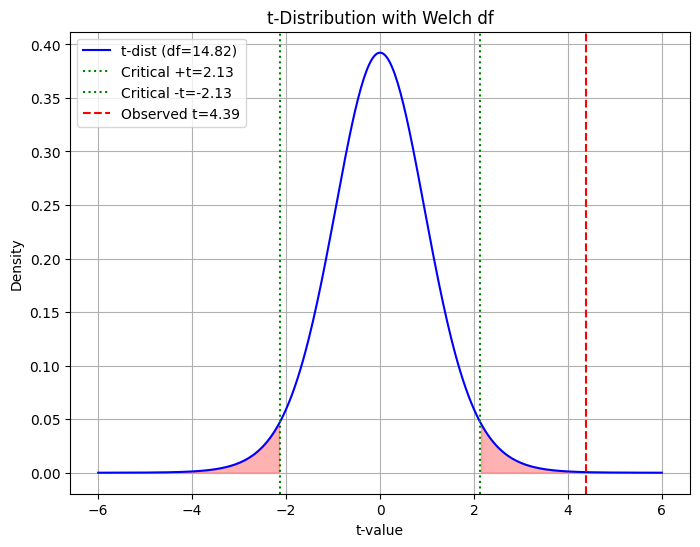

In [20]:
plot_t_distribution(res1.statistic, res1.df)

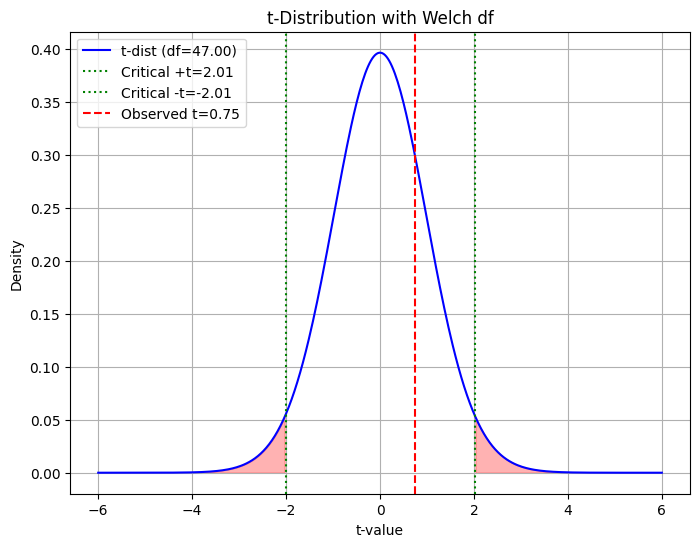

In [21]:
plot_t_distribution(res2.statistic, res2.df)

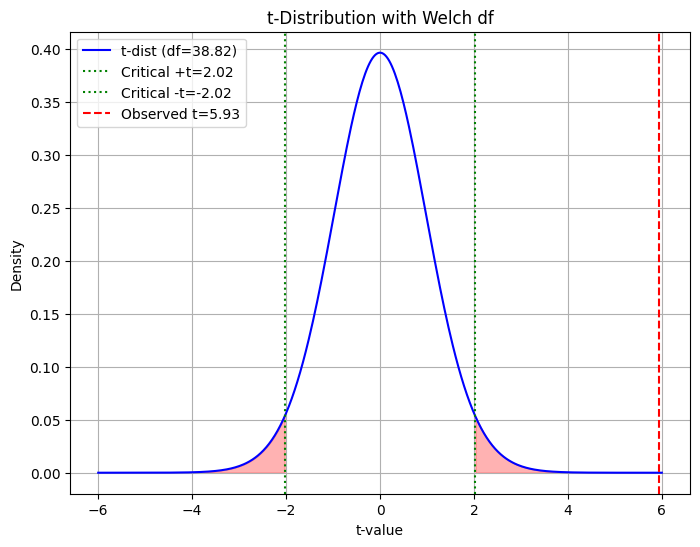

In [22]:
plot_t_distribution(res3.statistic, res3.df)